In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv('Results/K clustering Biomarker/All cell lines Crispr Gene_OmicsEPCG_clustering.csv')
data.head()

,Unnamed: 0,Gene,Crispr Dep,Crispr Gene,Omics_CN_Gene,Omics_EPCG
0,0,A1BG,-0.040015,0.053587,-0.037946,-0.093893
1,1,A1CF,0.039989,-0.036381,-0.011779,-0.079961
2,2,A2M,0.092853,-0.059708,-0.052906,-0.011244
3,3,A2ML1,0.036169,0.002672,-0.053818,-0.038121
4,4,A3GALT2,-0.053086,0.087945,0.031896,0.050417


In [29]:
data = data.drop(columns={"Unnamed: 0"})
data.head()

,Gene,Crispr Dep,Crispr Gene,Omics_CN_Gene,Omics_EPCG
0,A1BG,-0.040015,0.053587,-0.037946,-0.093893
1,A1CF,0.039989,-0.036381,-0.011779,-0.079961
2,A2M,0.092853,-0.059708,-0.052906,-0.011244
3,A2ML1,0.036169,0.002672,-0.053818,-0.038121
4,A3GALT2,-0.053086,0.087945,0.031896,0.050417


In [30]:
data = data.drop(columns={"Crispr Dep", "Omics_CN_Gene"})
data.head()

,Gene,Crispr Gene,Omics_EPCG
0,A1BG,0.053587,-0.093893
1,A1CF,-0.036381,-0.079961
2,A2M,-0.059708,-0.011244
3,A2ML1,0.002672,-0.038121
4,A3GALT2,0.087945,0.050417


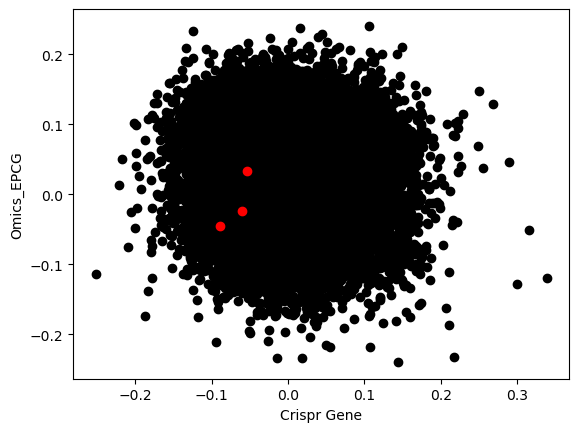

In [5]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster
X=data
#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Crispr Gene"],X["Omics_EPCG"],c='black')
plt.scatter(Centroids["Crispr Gene"],Centroids["Omics_EPCG"],c='red')
plt.xlabel('Crispr Gene')
plt.ylabel('Omics_EPCG')
plt.show()

In [7]:
diff = 1
j = 0

while not (-0.0001 <= diff <= 0.0001):
    XD = X.copy()
    i = 1
    for index1, row_c in Centroids.iterrows():
        ED = []
        for index2, row_d in XD.iterrows():
            d1 = (row_c["Crispr Gene"] - row_d["Crispr Gene"]) ** 2
            d2 = (row_c["Omics_EPCG"] - row_d["Omics_EPCG"]) ** 2
            d = np.sqrt(d1 + d2)
            ED.append(d)
        X[i] = ED
        i = i + 1

    C = []
    for index, row in X.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(K):
            if row[i + 1] < min_dist:
                min_dist = row[i + 1]
                pos = i + 1
        C.append(pos)
    X["Cluster"] = C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Omics_EPCG", "Crispr Gene"]]
    if j == 0:
        diff = 1
        j = j + 1
    else:
        diff = abs((Centroids_new['Omics_EPCG'] - Centroids['Omics_EPCG']).sum()) + abs(
            (Centroids_new['Crispr Gene'] - Centroids['Crispr Gene']).sum())
        print(diff)
    Centroids = X.groupby(["Cluster"]).mean()[["Omics_EPCG", "Crispr Gene"]]


C:\Users\Big Brain Computer\AppData\Local\Temp\ipykernel_7932\3109422553.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Centroids_new = X.groupby(["Cluster"]).mean()[["Omics_EPCG", "Crispr Gene"]]
C:\Users\Big Brain Computer\AppData\Local\Temp\ipykernel_7932\3109422553.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Centroids = X.groupby(["Cluster"]).mean()[["Omics_EPCG", "Crispr Gene"]]
C:\Users\Big Brain Computer\AppData\Local\Temp\ipykernel_7932\3109422553.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will defa

0.00017561867267583734


C:\Users\Big Brain Computer\AppData\Local\Temp\ipykernel_7932\3109422553.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Centroids_new = X.groupby(["Cluster"]).mean()[["Omics_EPCG", "Crispr Gene"]]
C:\Users\Big Brain Computer\AppData\Local\Temp\ipykernel_7932\3109422553.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Centroids = X.groupby(["Cluster"]).mean()[["Omics_EPCG", "Crispr Gene"]]


0.00013743561068497762


C:\Users\Big Brain Computer\AppData\Local\Temp\ipykernel_7932\3109422553.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Centroids_new = X.groupby(["Cluster"]).mean()[["Omics_EPCG", "Crispr Gene"]]
C:\Users\Big Brain Computer\AppData\Local\Temp\ipykernel_7932\3109422553.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Centroids = X.groupby(["Cluster"]).mean()[["Omics_EPCG", "Crispr Gene"]]


0.0001861335537020135


C:\Users\Big Brain Computer\AppData\Local\Temp\ipykernel_7932\3109422553.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Centroids_new = X.groupby(["Cluster"]).mean()[["Omics_EPCG", "Crispr Gene"]]
C:\Users\Big Brain Computer\AppData\Local\Temp\ipykernel_7932\3109422553.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Centroids = X.groupby(["Cluster"]).mean()[["Omics_EPCG", "Crispr Gene"]]


0.00037278647067475476


C:\Users\Big Brain Computer\AppData\Local\Temp\ipykernel_7932\3109422553.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Centroids_new = X.groupby(["Cluster"]).mean()[["Omics_EPCG", "Crispr Gene"]]
C:\Users\Big Brain Computer\AppData\Local\Temp\ipykernel_7932\3109422553.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Centroids = X.groupby(["Cluster"]).mean()[["Omics_EPCG", "Crispr Gene"]]


0.00024873236701652285


C:\Users\Big Brain Computer\AppData\Local\Temp\ipykernel_7932\3109422553.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Centroids_new = X.groupby(["Cluster"]).mean()[["Omics_EPCG", "Crispr Gene"]]
C:\Users\Big Brain Computer\AppData\Local\Temp\ipykernel_7932\3109422553.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Centroids = X.groupby(["Cluster"]).mean()[["Omics_EPCG", "Crispr Gene"]]


0.00019350881863613653


C:\Users\Big Brain Computer\AppData\Local\Temp\ipykernel_7932\3109422553.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Centroids_new = X.groupby(["Cluster"]).mean()[["Omics_EPCG", "Crispr Gene"]]
C:\Users\Big Brain Computer\AppData\Local\Temp\ipykernel_7932\3109422553.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Centroids = X.groupby(["Cluster"]).mean()[["Omics_EPCG", "Crispr Gene"]]


0.00016137633833310933
2.8572150795256636e-05


C:\Users\Big Brain Computer\AppData\Local\Temp\ipykernel_7932\3109422553.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Centroids_new = X.groupby(["Cluster"]).mean()[["Omics_EPCG", "Crispr Gene"]]
C:\Users\Big Brain Computer\AppData\Local\Temp\ipykernel_7932\3109422553.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Centroids = X.groupby(["Cluster"]).mean()[["Omics_EPCG", "Crispr Gene"]]


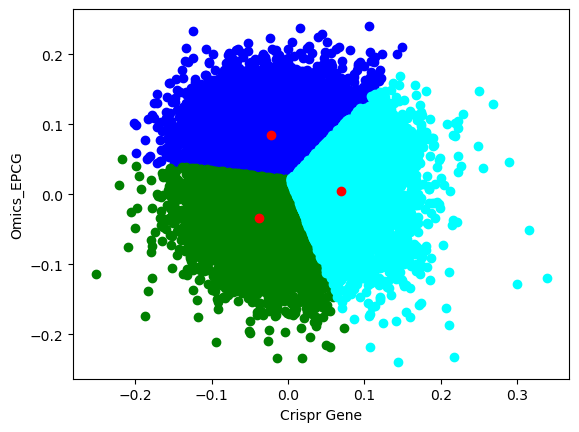

In [8]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Crispr Gene"],data["Omics_EPCG"],c=color[k])
plt.scatter(Centroids["Crispr Gene"],Centroids["Omics_EPCG"],c='red')
plt.xlabel('Crispr Gene')
plt.ylabel('Omics_EPCG')
plt.show()

In [9]:
# statistics of the data
data.describe()

,Crispr Gene,Omics_EPCG,1,2,3,Cluster
count,5452.000000,5452.000000,5452.000000,5452.000000,5452.000000,5452.0
mean,0.068826,0.004930,0.129837,0.124013,0.057080,3.0
std,0.039840,0.051728,0.045017,0.044250,0.031695,0.0
min,0.003854,-0.239655,0.061038,0.057403,0.001157,3.0
25%,0.038832,-0.027527,0.095368,0.089242,0.036234,3.0
50%,0.062173,0.007407,0.121858,0.116192,0.052057,3.0
75%,0.090276,0.038812,0.156011,0.150733,0.070070,3.0
max,0.338448,0.168983,0.414815,0.386898,0.297158,3.0


In [15]:
data.head()

,Gene,Crispr Gene,Omics_EPCG
0,A1BG,0.053587,-0.093893
1,A1CF,-0.036381,-0.079961
2,A2M,-0.059708,-0.011244
3,A2ML1,0.002672,-0.038121
4,A3GALT2,0.087945,0.050417


In [31]:
data= data.drop(columns={'Gene'})

In [32]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1
count,1.691800e+04,1.691800e+04
mean,-1.343975e-17,3.947926e-17
std,1.000030e+00,1.000030e+00
min,-3.938277e+00,-3.850211e+00
25%,-6.797449e-01,-6.837547e-01
50%,-2.003030e-02,2.942776e-03
75%,6.636793e-01,6.972535e-01
max,5.242793e+00,3.302321e+00


In [21]:
from sklearn.cluster import KMeans
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [22]:

# inertia on the fitted data
kmeans.inertia_

22859.923786242507

Text(0, 0.5, 'Inertia')

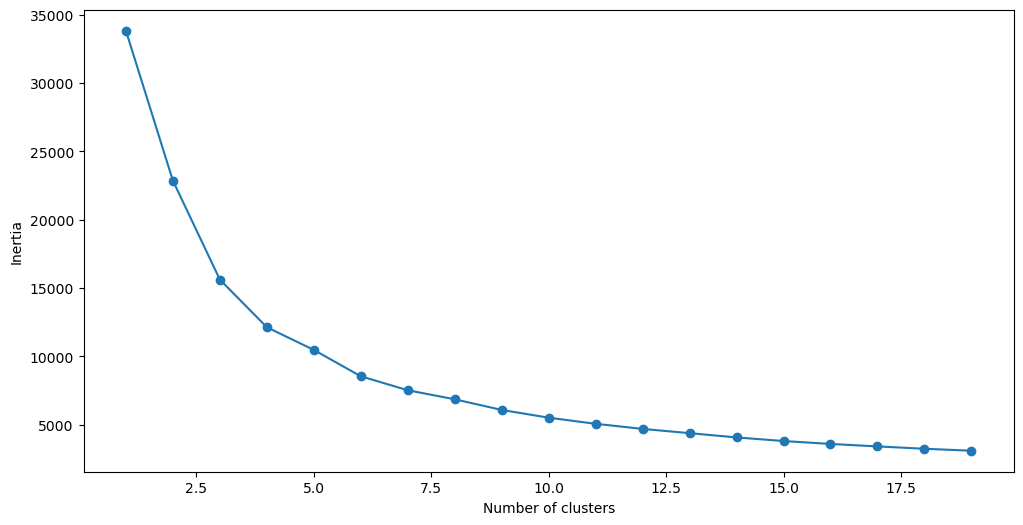

In [24]:
# Fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1, 20):
    kmeans = KMeans(n_clusters=cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# Converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster': range(1, 20), 'SSE': SSE})
plt.figure(figsize=(12, 6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


In [26]:
import os
os.environ['OMP_NUM_THREADS'] = '1'


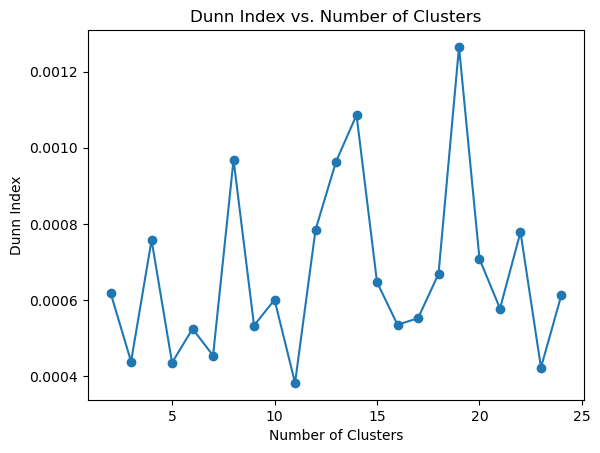

In [33]:
from sklearn.metrics import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

def dunn_index(data, clusters_range):
    """
    Calculate the Dunn index for different numbers of clusters and plot the results.

    Parameters:
    - data: The dataset for clustering.
    - clusters_range: A range of numbers of clusters to evaluate.

    Returns:
    - None
    """

    def cluster_diameter(cluster_data):
        """
        Calculate the diameter of a cluster (maximum distance between any two points in the cluster).

        Parameters:
        - cluster_data: Data points in the cluster.

        Returns:
        - diameter: Diameter of the cluster.
        """
        return np.max(pairwise_distances(cluster_data))

    def cluster_separation(cluster1_data, cluster2_data):
        """
        Calculate the separation between two clusters (minimum distance between any two points from different clusters).

        Parameters:
        - cluster1_data: Data points in the first cluster.
        - cluster2_data: Data points in the second cluster.

        Returns:
        - separation: Separation between the two clusters.
        """
        return np.min(pairwise_distances(cluster1_data, cluster2_data))

    dunn_scores = []

    for num_clusters in clusters_range:
        kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
        kmeans.fit(data)
        cluster_centers = kmeans.cluster_centers_
        labels = kmeans.labels_

        cluster_data = [data[labels == i] for i in range(num_clusters)]
        cluster_diameters = [cluster_diameter(cluster) for cluster in cluster_data]
        max_cluster_diameter = np.max(cluster_diameters)

        cluster_separations = []
        for i in range(num_clusters):
            for j in range(i + 1, num_clusters):
                cluster_separations.append(cluster_separation(cluster_data[i], cluster_data[j]))
        min_cluster_separation = np.min(cluster_separations)

        dunn_score = min_cluster_separation / max_cluster_diameter
        dunn_scores.append(dunn_score)

    # Plot Dunn index
    plt.plot(clusters_range, dunn_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Dunn Index')
    plt.title('Dunn Index vs. Number of Clusters')
    plt.show()

# Example usage
#data = np.random.rand(100, 2)  # Example dataset
clusters_range = range(2, 25)   # Range of numbers of clusters to evaluate
dunn_index(data_scaled, clusters_range)
